•2.1 Basic CNN model
•Generate two classification models for FMNIST/CIFAR10 datasets with keras sequential/functional API

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 

fmnist = keras.datasets.fashion_mnist

(x_train, y_train) , (x_test, y_test) = fmnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


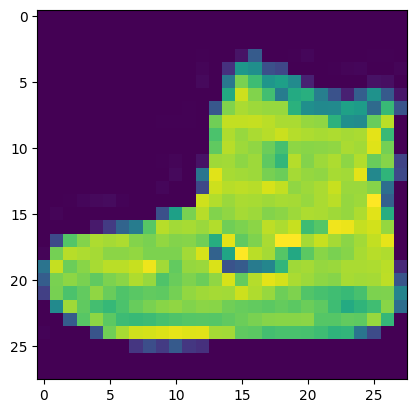

In [2]:
plt.imshow(x_train[0])

In [3]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

print(np.max(np.max(x_train_scaled)), np.min(np.min(x_train_scaled)))
print(np.max(np.max(x_test_scaled)), np.min(np.min(x_test_scaled)))

1.0 0.0
1.0 0.0


In [4]:
x_train_scaled = x_train_scaled.reshape(-1,28,28,1)
x_test_scaled = x_test_scaled.reshape(-1,28,28,1)

print(x_train_scaled.shape)

(60000, 28, 28, 1)


In [5]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

print(y_train[0:5])
print(y_train_onehot[0:5])

[9 0 0 3 0]
[[0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


##### FMIST CNN 1-1

In [6]:
import tensorflow as tf
from tensorflow.keras import layers

In [7]:
# FMNIST Model using Sequential API
def create_fmnist_sequential_model():
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

    return model

In [13]:
model = create_fmnist_sequential_model()

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(x_train_scaled, y_train_onehot, epochs=30, batch_size=128, validation_split=0.2)
model.evaluate(x_test_scaled, y_test_onehot)

Epoch 1/30
375/375 [==============================] - 2s 5ms/step - loss: 0.6465 - accuracy: 0.7654 - val_loss: 0.4071 - val_accuracy: 0.8562
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4055 - accuracy: 0.8537 - val_loss: 0.3587 - val_accuracy: 0.8712
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3569 - accuracy: 0.8712 - val_loss: 0.3315 - val_accuracy: 0.8770
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3211 - accuracy: 0.8832 - val_loss: 0.3034 - val_accuracy: 0.8884
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2985 - accuracy: 0.8914 - val_loss: 0.2913 - val_accuracy: 0.8949
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2791 - accuracy: 0.8990 - val_loss: 0.2772 - val_accuracy: 0.8980
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2613 - accuracy: 0.9043 - val_loss: 0.2651 - val_accuracy: 0.9047
Epoch 

[0.33735111355781555, 0.9140999913215637]

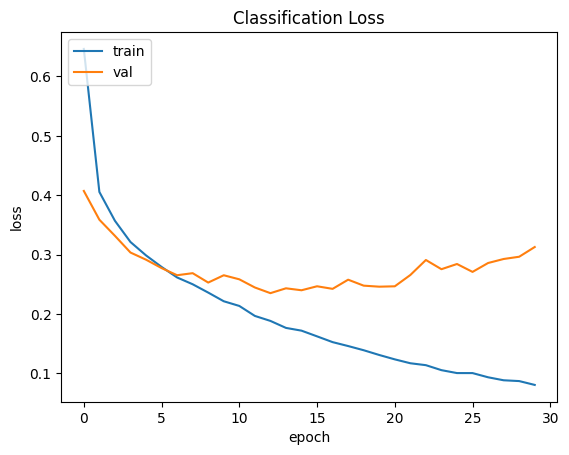

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Classification Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'] , loc = 'upper left')
plt.show()

##### CIFAR10-CNN 1-2

In [18]:
cifar10 = keras.datasets.cifar10

(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 17s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


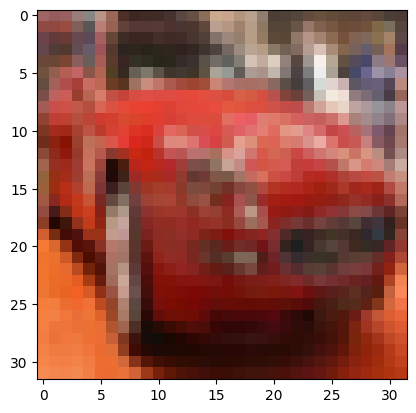

In [19]:
plt.imshow(x_train[5])

In [20]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

In [28]:
# CIFAR10 Model using Sequential API
def create_cifar10_sequential_model():
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),
        
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    return model

In [33]:
model = create_cifar10_sequential_model()

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(x_train_scaled, y_train_onehot, epochs=30, batch_size=64, validation_split=0.2)
model.evaluate(x_test_scaled, y_test_onehot)

Epoch 1/30
625/625 [==============================] - 4s 6ms/step - loss: 1.6647 - accuracy: 0.4430 - val_loss: 1.4508 - val_accuracy: 0.4997
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 1.1394 - accuracy: 0.5956 - val_loss: 1.0532 - val_accuracy: 0.6299
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 0.9733 - accuracy: 0.6551 - val_loss: 0.8877 - val_accuracy: 0.6910
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 0.8874 - accuracy: 0.6880 - val_loss: 0.8658 - val_accuracy: 0.6924
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 0.8195 - accuracy: 0.7100 - val_loss: 0.8892 - val_accuracy: 0.6884
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.7710 - accuracy: 0.7290 - val_loss: 0.7352 - val_accuracy: 0.7430
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.7267 - accuracy: 0.7455 - val_loss: 0.6684 - val_accuracy: 0.7662
Epoch 

[0.5234662890434265, 0.824999988079071]

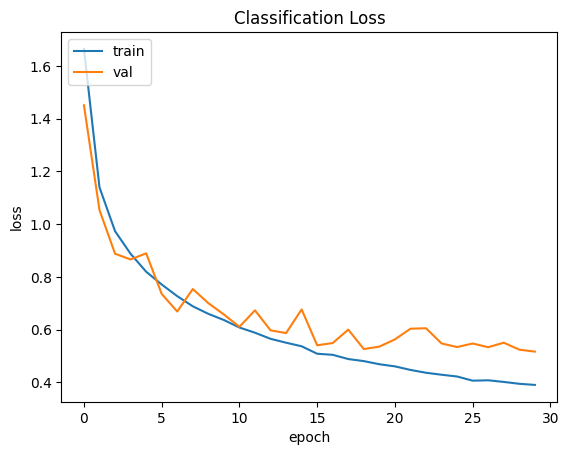

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Classification Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'] , loc = 'upper left')
plt.show()

##### ResNet 2

In [37]:
cifar10 = keras.datasets.cifar10

(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [38]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

In [47]:
from keras.applications import ResNet50

base_model = ResNet50(input_shape=(32,32,3) , include_top=False, weights='imagenet')
base_model.trainable = False
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [48]:
from tensorflow.keras import layers

transfer_model = keras.Sequential([base_model, layers.Flatten(), layers.Dense(4096, activation='relu'), layers.Dense(10, activation='softmax')])
transfer_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
transfer_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_10 (Flatten)        (None, 2048)              0         
                                                                 
 dense_17 (Dense)            (None, 4096)              8392704   
                                                                 
 dense_18 (Dense)            (None, 10)                40970     
                                                                 
Total params: 32,021,386
Trainable params: 8,433,674
Non-trainable params: 23,587,712
_________________________________________________________________


In [49]:
history = transfer_model.fit(x_train_scaled, y_train_onehot, validation_data= [x_test_scaled,y_test_onehot], batch_size=128, epochs=100)

Epoch 1/100
391/391 [==============================] - 7s 14ms/step - loss: 2.2878 - accuracy: 0.2434 - val_loss: 1.9073 - val_accuracy: 0.2987
Epoch 2/100
391/391 [==============================] - 5s 12ms/step - loss: 1.8993 - accuracy: 0.3090 - val_loss: 1.8882 - val_accuracy: 0.3045
Epoch 3/100
391/391 [==============================] - 5s 12ms/step - loss: 1.8422 - accuracy: 0.3326 - val_loss: 1.8705 - val_accuracy: 0.3266
Epoch 4/100
391/391 [==============================] - 5s 12ms/step - loss: 1.8158 - accuracy: 0.3427 - val_loss: 1.8237 - val_accuracy: 0.3305
Epoch 5/100
391/391 [==============================] - 5s 12ms/step - loss: 1.7897 - accuracy: 0.3534 - val_loss: 1.8121 - val_accuracy: 0.3433
Epoch 6/100
391/391 [==============================] - 4s 11ms/step - loss: 1.7666 - accuracy: 0.3619 - val_loss: 1.7379 - val_accuracy: 0.3703
Epoch 7/100
391/391 [==============================] - 5s 12ms/step - loss: 1.7442 - accuracy: 0.3727 - val_loss: 1.7349 - val_accuracy:

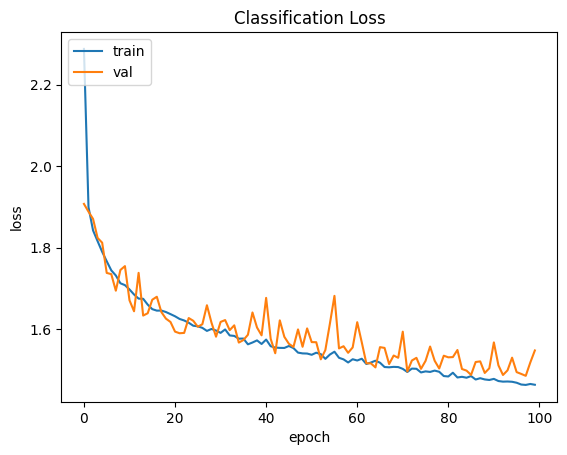

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Classification Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'] , loc = 'upper left')
plt.show()

In [51]:
#fine tuning

# Unfreeze the base model
base_model.trainable = True

transfer_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = transfer_model.fit(x_train_scaled, y_train_onehot, validation_data= [x_test_scaled,y_test_onehot], batch_size=128, epochs=50)

Epoch 1/50
391/391 [==============================] - 19s 41ms/step - loss: 2.9179 - accuracy: 0.3886 - val_loss: 4.0082 - val_accuracy: 0.1004
Epoch 2/50
391/391 [==============================] - 13s 34ms/step - loss: 1.2717 - accuracy: 0.5938 - val_loss: 2.5367 - val_accuracy: 0.2599
Epoch 3/50
391/391 [==============================] - 14s 35ms/step - loss: 0.9029 - accuracy: 0.7023 - val_loss: 0.8314 - val_accuracy: 0.7162
Epoch 4/50
391/391 [==============================] - 13s 34ms/step - loss: 0.9167 - accuracy: 0.7198 - val_loss: 1.1896 - val_accuracy: 0.6702
Epoch 5/50
391/391 [==============================] - 13s 34ms/step - loss: 0.7326 - accuracy: 0.7624 - val_loss: 0.7850 - val_accuracy: 0.7333
Epoch 6/50
391/391 [==============================] - 14s 35ms/step - loss: 1.1423 - accuracy: 0.6058 - val_loss: 1.4858 - val_accuracy: 0.5879
Epoch 7/50
391/391 [==============================] - 22s 57ms/step - loss: 0.8444 - accuracy: 0.7097 - val_loss: 0.9582 - val_accuracy:

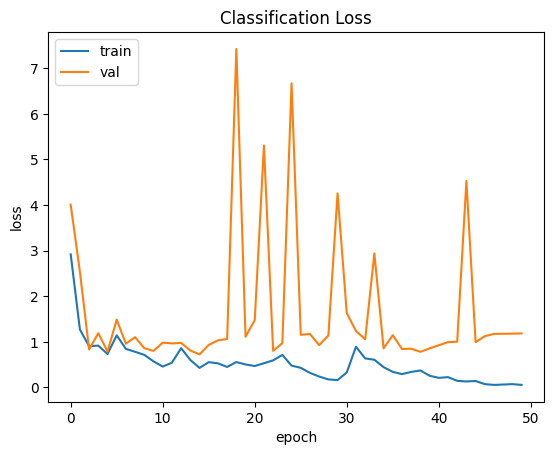

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Classification Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'] , loc = 'upper left')
plt.show()